# Qianyu Shang

## Which champion is most commonly used in the last round of game?

My research question is to find the champion most popular(commonly used) at the last round of the TFT game.

In [ ]:
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import ast
import numpy as np

In [ ]:
myDatabase = pd.read_csv('../data/raw/TFT_GrandMaster_MatchData.csv')
myDatabase

,gameId,gameDuration,level,lastRound,Ranked,ingameDuration,combination,champion
0,KR_4254769102,2319.661377,9,38,1,2311.472168,"{'Blaster': 4, 'Chrono': 2, 'Cybernetic': 2, '...","{'Malphite': {'items': [], 'star': 2}, 'Blitzc..."
1,KR_4254769102,2319.661377,9,38,2,2311.472168,"{'Blaster': 2, 'Chrono': 2, 'Cybernetic': 6, '...","{'Fiora': {'items': [], 'star': 2}, 'Leona': {..."
2,KR_4254769102,2319.661377,9,37,3,2247.994873,"{'DarkStar': 2, 'Protector': 4, 'Rebel': 1, 'S...","{'JarvanIV': {'items': [], 'star': 3}, 'Sona':..."
3,KR_4254769102,2319.661377,7,33,4,1996.358643,"{'DarkStar': 2, 'Demolitionist': 1, 'Infiltrat...","{'KhaZix': {'items': [], 'star': 2}, 'KaiSa': ..."
4,KR_4254769102,2319.661377,8,31,5,1871.789551,"{'Chrono': 1, 'Cybernetic': 1, 'DarkStar': 3, ...","{'Leona': {'items': [], 'star': 1}, 'Mordekais..."
...,...,...,...,...,...,...,...,...
79995,KR_4365780453,1957.781738,8,33,4,1765.595581,"{'Blaster': 4, 'Chrono': 2, 'Cybernetic': 1, '...","{'Malphite': {'items': [], 'star': 2}, 'Graves..."
79996,KR_4365780453,1957.781738,8,33,5,1764.012573,"{'Blaster': 2, 'Chrono': 2, 'Demolitionist': 2...","{'Blitzcrank': {'items': [67], 'star': 2}, 'Ru..."
79997,KR_4365780453,1957.781738,8,31,6,1664.981812,"{'Blaster': 4, 'Chrono': 2, 'Cybernetic': 2, '...","{'Malphite': {'items': [], 'star': 1}, 'Graves..."
79998,KR_4365780453,1957.781738,8,28,7,1515.034302,"{'Blaster': 2, 'Chrono': 2, 'Cybernetic': 3, '...","{'Malphite': {'items': [], 'star': 2}, 'Graves..."


In [ ]:
myDatabase.head()

,gameId,gameDuration,level,lastRound,Ranked,ingameDuration,combination,champion
0,KR_4254769102,2319.661377,9,38,1,2311.472168,"{'Blaster': 4, 'Chrono': 2, 'Cybernetic': 2, '...","{'Malphite': {'items': [], 'star': 2}, 'Blitzc..."
1,KR_4254769102,2319.661377,9,38,2,2311.472168,"{'Blaster': 2, 'Chrono': 2, 'Cybernetic': 6, '...","{'Fiora': {'items': [], 'star': 2}, 'Leona': {..."
2,KR_4254769102,2319.661377,9,37,3,2247.994873,"{'DarkStar': 2, 'Protector': 4, 'Rebel': 1, 'S...","{'JarvanIV': {'items': [], 'star': 3}, 'Sona':..."
3,KR_4254769102,2319.661377,7,33,4,1996.358643,"{'DarkStar': 2, 'Demolitionist': 1, 'Infiltrat...","{'KhaZix': {'items': [], 'star': 2}, 'KaiSa': ..."
4,KR_4254769102,2319.661377,8,31,5,1871.789551,"{'Chrono': 1, 'Cybernetic': 1, 'DarkStar': 3, ...","{'Leona': {'items': [], 'star': 1}, 'Mordekais..."


# Milestone 3

## Task 1: EDA

In [ ]:
myDatabase.shape

(80000, 8)

In [ ]:
myDatabase.columns

Index(['gameId', 'gameDuration', 'level', 'lastRound', 'Ranked',
       'ingameDuration', 'combination', 'champion'],
      dtype='object')

In [ ]:
myDatabase.describe()

,gameDuration,level,lastRound,Ranked,ingameDuration
count,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000
mean,2154.342035,7.895225,33.586700,4.499650,1875.537714
std,136.154835,0.758818,4.790018,2.291608,265.434429
min,125.278297,3.000000,4.000000,0.000000,123.155220
25%,2062.858154,8.000000,30.000000,2.000000,1704.234009
50%,2146.097900,8.000000,34.000000,4.000000,1897.793030
75%,2241.005310,8.000000,37.000000,6.000000,2062.072266
max,2775.935547,9.000000,49.000000,8.000000,2767.582275


In [ ]:
myDatabase.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gameId          80000 non-null  object 
 1   gameDuration    80000 non-null  float64
 2   level           80000 non-null  int64  
 3   lastRound       80000 non-null  int64  
 4   Ranked          80000 non-null  int64  
 5   ingameDuration  80000 non-null  float64
 6   combination     80000 non-null  object 
 7   champion        80000 non-null  object 
dtypes: float64(2), int64(3), object(3)
memory usage: 4.9+ MB


In [ ]:
myDatabase.champion.describe()

count     80000
unique    79953
top          {}
freq         46
Name: champion, dtype: object

In [ ]:
myDatabase.champion.unique()

array(["{'Malphite': {'items': [], 'star': 2}, 'Blitzcrank': {'items': [58], 'star': 2}, 'Lucian': {'items': [6, 67], 'star': 2}, 'Ezreal': {'items': [], 'star': 2}, 'Vi': {'items': [67], 'star': 2}, 'Jinx': {'items': [23, 15, 12], 'star': 2}, 'ChoGath': {'items': [], 'star': 2}, 'Kayle': {'items': [], 'star': 1}, 'MissFortune': {'items': [23, 56, 25], 'star': 2}}",
       "{'Fiora': {'items': [], 'star': 2}, 'Leona': {'items': [], 'star': 2}, 'Lucian': {'items': [29, 67, 12], 'star': 2}, 'Ezreal': {'items': [57], 'star': 2}, 'Vi': {'items': [], 'star': 2}, 'Irelia': {'items': [16, 19, 15], 'star': 2}, 'Kayle': {'items': [], 'star': 2}, 'Thresh': {'items': [], 'star': 1}, 'Ekko': {'items': [34, 67], 'star': 2}}",
       "{'JarvanIV': {'items': [], 'star': 3}, 'Sona': {'items': [], 'star': 2}, 'Rakan': {'items': [37, 14, 15], 'star': 3}, 'XinZhao': {'items': [66, 25, 69], 'star': 3}, 'Neeko': {'items': [99, 69, 11], 'star': 2}, 'Karma': {'items': [], 'star': 2}, 'Ashe': {'items': [], 's

In [ ]:
myDatabase.Ranked.unique()

array([1, 2, 3, 4, 5, 6, 7, 8, 0], dtype=int64)

<AxesSubplot: >

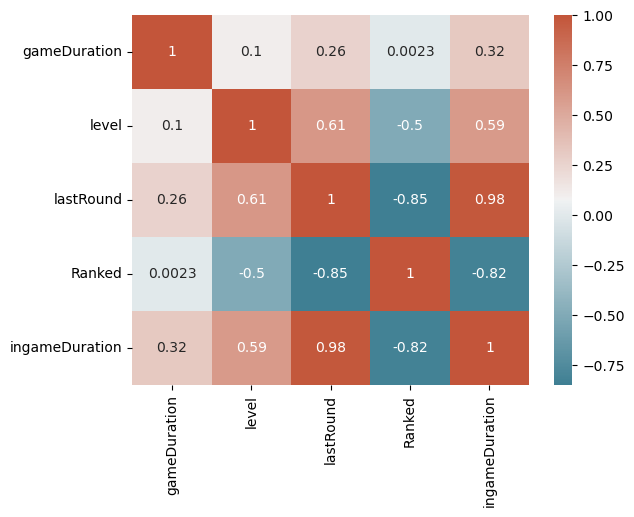

In [ ]:
# calculate correlation matrix
corr = myDatabase.corr()# plot the heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

Based on our definition of 'Ranked', the lowest value, integer 1 means the winner/top rank of each play, and 8 means the bottom rank of the play. From the HeatMap above, we can see that there is a positive correlation between lastRound and ingameDuration — the more rounds a player played the more ingameDuration the player has.

C:\Users\User\miniconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<AxesSubplot: xlabel='lastRound', ylabel='ingameDuration'>

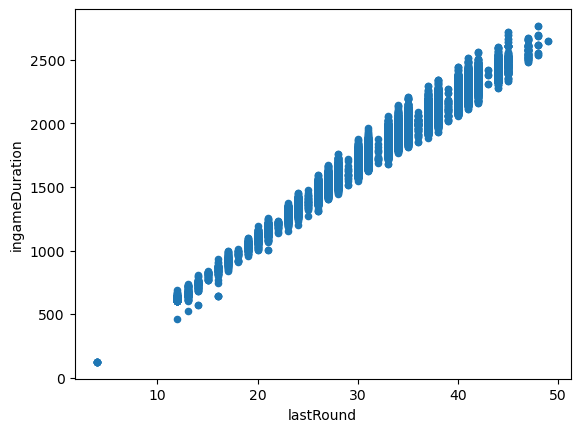

In [ ]:
myDatabase.plot(kind='scatter', x='lastRound', y='ingameDuration')

The above shows the positive correlation between the lastRound and ingameDuration mentioned in the above heatmap

<AxesSubplot: ylabel='Frequency'>

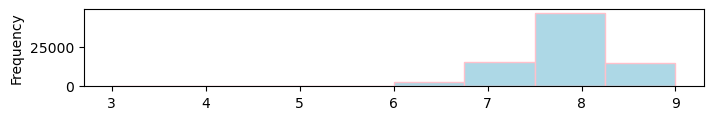

In [ ]:
myDatabase['level'].plot(kind='hist', bins=8, figsize=(8,1), facecolor='lightblue',edgecolor='pink')

The about count plot shows the frequency of each level at the end of plays

## Task 2: Set up an 'Analysis Pipeline'

In [ ]:
df=myDatabase.drop(["gameId","gameDuration","level","lastRound","ingameDuration"], axis="columns")
df=df.drop(df[df.Ranked!=1].index)
df=df.reset_index()
df.head()

,index,Ranked,combination,champion
0,0,1,"{'Blaster': 4, 'Chrono': 2, 'Cybernetic': 2, '...","{'Malphite': {'items': [], 'star': 2}, 'Blitzc..."
1,8,1,"{'DarkStar': 3, 'Demolitionist': 1, 'Infiltrat...","{'KhaZix': {'items': [57], 'star': 2}, 'KaiSa'..."
2,16,1,"{'DarkStar': 1, 'Demolitionist': 3, 'Infiltrat...","{'Zoe': {'items': [], 'star': 2}, 'Ahri': {'it..."
3,24,1,"{'Chrono': 1, 'DarkStar': 3, 'Set3_Celestial':...","{'Poppy': {'items': [], 'star': 2}, 'Mordekais..."
4,32,1,"{'Blaster': 2, 'Demolitionist': 2, 'Mercenary'...","{'Ziggs': {'items': [], 'star': 1}, 'Sona': {'..."


Check if there is any missing or null data in the dataset

In [ ]:
print(pd.isnull(df).values.any())

False


Now below is my final dataset

In [ ]:
df

,index,Ranked,combination,champion
0,0,1,"{'Blaster': 4, 'Chrono': 2, 'Cybernetic': 2, '...","{'Malphite': {'items': [], 'star': 2}, 'Blitzc..."
1,8,1,"{'DarkStar': 3, 'Demolitionist': 1, 'Infiltrat...","{'KhaZix': {'items': [57], 'star': 2}, 'KaiSa'..."
2,16,1,"{'DarkStar': 1, 'Demolitionist': 3, 'Infiltrat...","{'Zoe': {'items': [], 'star': 2}, 'Ahri': {'it..."
3,24,1,"{'Chrono': 1, 'DarkStar': 3, 'Set3_Celestial':...","{'Poppy': {'items': [], 'star': 2}, 'Mordekais..."
4,32,1,"{'Blaster': 2, 'Demolitionist': 2, 'Mercenary'...","{'Ziggs': {'items': [], 'star': 1}, 'Sona': {'..."
...,...,...,...,...
9994,79960,1,"{'Blaster': 2, 'Chrono': 2, 'Cybernetic': 6, '...","{'Fiora': {'items': [5], 'star': 2}, 'Leona': ..."
9995,79968,1,"{'Blaster': 2, 'Cybernetic': 6, 'Infiltrator':...","{'Fiora': {'items': [27], 'star': 2}, 'Leona':..."
9996,79976,1,"{'Blaster': 4, 'Chrono': 2, 'Cybernetic': 2, '...","{'Malphite': {'items': [], 'star': 2}, 'Graves..."
9997,79984,1,"{'Blaster': 4, 'Chrono': 2, 'Cybernetic': 1, '...","{'Malphite': {'items': [], 'star': 2}, 'Graves..."


## Task 3: Method Chaining

#### Step 1

In [ ]:
df=(
    pd.read_csv("../data/raw/TFT_GrandMaster_MatchData.csv")
    .drop(["gameId","gameDuration","level","lastRound","ingameDuration"], axis="columns")
    .loc[lambda x: x['Ranked']==1]
    .reset_index()
    .drop(["index"], axis="columns")
    .assign(combination_dict=lambda df:
            df['combination'].apply(lambda x: ast.literal_eval(x)))
    .drop(["combination"], axis="columns")
)
df

,Ranked,champion,combination_dict
0,1,"{'Malphite': {'items': [], 'star': 2}, 'Blitzc...","{'Blaster': 4, 'Chrono': 2, 'Cybernetic': 2, '..."
1,1,"{'KhaZix': {'items': [57], 'star': 2}, 'KaiSa'...","{'DarkStar': 3, 'Demolitionist': 1, 'Infiltrat..."
2,1,"{'Zoe': {'items': [], 'star': 2}, 'Ahri': {'it...","{'DarkStar': 1, 'Demolitionist': 3, 'Infiltrat..."
3,1,"{'Poppy': {'items': [], 'star': 2}, 'Mordekais...","{'Chrono': 1, 'DarkStar': 3, 'Set3_Celestial':..."
4,1,"{'Ziggs': {'items': [], 'star': 1}, 'Sona': {'...","{'Blaster': 2, 'Demolitionist': 2, 'Mercenary'..."
...,...,...,...
9994,1,"{'Fiora': {'items': [5], 'star': 2}, 'Leona': ...","{'Blaster': 2, 'Chrono': 2, 'Cybernetic': 6, '..."
9995,1,"{'Fiora': {'items': [27], 'star': 2}, 'Leona':...","{'Blaster': 2, 'Cybernetic': 6, 'Infiltrator':..."
9996,1,"{'Malphite': {'items': [], 'star': 2}, 'Graves...","{'Blaster': 4, 'Chrono': 2, 'Cybernetic': 2, '..."
9997,1,"{'Malphite': {'items': [], 'star': 2}, 'Graves...","{'Blaster': 4, 'Chrono': 2, 'Cybernetic': 1, '..."


#### Step 2

In [ ]:
def load_and_process(url_or_path_to_csv_file):

    # Method Chain 1 (Load data and deal with missing data)

    df1 = (
        pd.read_csv(url_or_path_to_csv_file)
        .dropna()
        .drop(["gameId","gameDuration","level","lastRound","ingameDuration"], axis="columns")
        .loc[lambda x: x['Ranked']==1]
        .reset_index()
        .drop(["index"], axis="columns")
      )

    # Method Chain 2 (Create new columns, drop others, and do processing)

    df2 = (
        df1
        .assign(combination_dict=lambda df:
            df['combination'].apply(lambda x: ast.literal_eval(x)))
        .drop(["combination"], axis="columns")
      )

    # Make sure to return the latest dataframe

    return df2 

#### Test function

In [ ]:
load_and_process("../data/raw/TFT_GrandMaster_MatchData.csv")

,Ranked,champion,combination_dict
0,1,"{'Malphite': {'items': [], 'star': 2}, 'Blitzc...","{'Blaster': 4, 'Chrono': 2, 'Cybernetic': 2, '..."
1,1,"{'KhaZix': {'items': [57], 'star': 2}, 'KaiSa'...","{'DarkStar': 3, 'Demolitionist': 1, 'Infiltrat..."
2,1,"{'Zoe': {'items': [], 'star': 2}, 'Ahri': {'it...","{'DarkStar': 1, 'Demolitionist': 3, 'Infiltrat..."
3,1,"{'Poppy': {'items': [], 'star': 2}, 'Mordekais...","{'Chrono': 1, 'DarkStar': 3, 'Set3_Celestial':..."
4,1,"{'Ziggs': {'items': [], 'star': 1}, 'Sona': {'...","{'Blaster': 2, 'Demolitionist': 2, 'Mercenary'..."
...,...,...,...
9994,1,"{'Fiora': {'items': [5], 'star': 2}, 'Leona': ...","{'Blaster': 2, 'Chrono': 2, 'Cybernetic': 6, '..."
9995,1,"{'Fiora': {'items': [27], 'star': 2}, 'Leona':...","{'Blaster': 2, 'Cybernetic': 6, 'Infiltrator':..."
9996,1,"{'Malphite': {'items': [], 'star': 2}, 'Graves...","{'Blaster': 4, 'Chrono': 2, 'Cybernetic': 2, '..."
9997,1,"{'Malphite': {'items': [], 'star': 2}, 'Graves...","{'Blaster': 4, 'Chrono': 2, 'Cybernetic': 1, '..."


## Task 4: In Group